### 1.Groupby
Categorizing a dataset and applying a function to each group, whether an aggregation or transformation, is often a critical component of a data analysis workflow. After loading, merging, and preparing a dataset, you may need to compute group statistics or possibly pivot tables for reporting or visualization purposes. pandas provides a flexible groupby interface, enabling you to slice, dice, and summarize datasets in a natural way.

##### Group Operation : >  split-apply-combine
Data‐Frame, or otherwise, is split into groups based on one or more keys that you provide.The splitting is performed on a particular axis of an object. For example, a DataFramecan be grouped on its rows (axis=0) or its columns (axis=1). Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object.
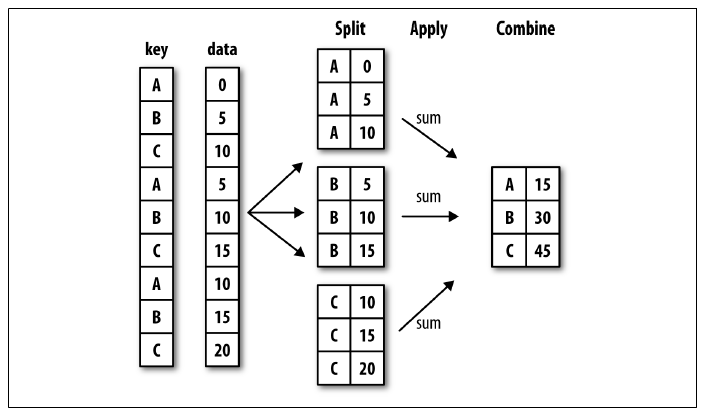

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.arange(5),
                   'data2' : np.arange(5,10)})
df

,key1,key2,data1,data2
0,a,one,0,5
1,a,two,1,6
2,b,one,2,7
3,b,two,3,8
4,a,one,4,9


Suppose you wanted to compute the mean of the data1 column using the labels from key1. There are a number of ways to do this. One is to access data1 and call groupby with the column (a Series) at key1:

In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped

This grouped variable is now a GroupBy object. It has not actually computed anything yet except for some intermediate data about the group key df['key1']. The idea is that this object has all of the information needed to then apply some operation to each of the groups. For example, to compute group means we can call the GroupBy’s mean method:

In [5]:
grouped.mean()

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

The data (a Series) has been aggregated according to the group key, producing a new Series that is now indexed by the unique values in the key1 column. The result index has the name 'key1' because the DataFrame column df['key1'] did
.

In [5]:
df

,key1,key2,data1,data2
0,a,one,0,5
1,a,two,1,6
2,b,one,2,7
3,b,two,3,8
4,a,one,4,9


In [6]:
means = df['data2'].groupby([df['key1'], df['key2']]).mean()
means  ## You can use it in 'data1' as well

key1  key2
a     one     7
      two     6
b     one     7
      two     8
Name: data2, dtype: int32

Here we grouped the data using two keys, and the resulting Series now has a hierarchical index consisting of the unique pairs of keys observed:

In [7]:
means.unstack()

key2,one,two
key1,,
a,7,6
b,7,8


In this example, the group keys are all Series, though they could be any arrays of the right length:

In [8]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    1.0
            2006    2.0
Ohio        2005    1.5
            2006    4.0
Name: data1, dtype: float64

Frequently the grouping information is found in the same DataFrame as the data you want to work on. In that case, you can pass column names (whether those are strings, numbers, or other Python objects) as the group keys:

In [9]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,1.666667,6.666667
b,2.500000,7.500000


In this case df.groupby('key1').mean() that there is no key2 column in the result. Because df['key2'] is not numeric data, it is said to be a nuisance column, which is therefore excluded from the result. By default, all of the numeric columns are aggregated
.

In [10]:
df.groupby(['key1', 'key2']).mean()

data1  data2
key1 key2              
a    one       2      7
     two       1      6
b    one       2      7
     two       3      8

Regardless of the objective in using groupby, a generally useful GroupBy method is size, which returns a Series containing group sizes:

In [11]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

##### DONE FOR TODAY

### Iterating Over Groups

In [8]:
df

,key1,key2,data1,data2
0,a,one,0,5
1,a,two,1,6
2,b,one,2,7
3,b,two,3,8
4,a,one,4,9


In [9]:
df.groupby('key1')

The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data.

In [15]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2  data1  data2
0    a  one      0      5
1    a  two      1      6
4    a  one      4      9
b
  key1 key2  data1  data2
2    b  one      2      7
3    b  two      3      8


In the case of multiple keys, the first element in the tuple will be a tuple of key values:

In [16]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2  data1  data2
0    a  one      0      5
4    a  one      4      9
('a', 'two')
  key1 key2  data1  data2
1    a  two      1      6
('b', 'one')
  key1 key2  data1  data2
2    b  one      2      7
('b', 'two')
  key1 key2  data1  data2
3    b  two      3      8


You can choose to do whatever you want with the pieces of data. A recipe
you may find useful is computing a dict of the data pieces as a one-liner

In [17]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2  data1  data2
 0    a  one      0      5
 1    a  two      1      6
 4    a  one      4      9, 'b':   key1 key2  data1  data2
 2    b  one      2      7
 3    b  two      3      8}

In [18]:
pieces['b']

,key1,key2,data1,data2
2,b,one,2,7
3,b,two,3,8


In [19]:
pieces['a']

,key1,key2,data1,data2
0,a,one,0,5
1,a,two,1,6
4,a,one,4,9


By default groupby groups on axis=0, but you can group on any of the other axes.For example, we could group the columns of our example df here by dtype like so:

In [10]:
df

,key1,key2,data1,data2
0,a,one,0,5
1,a,two,1,6
2,b,one,2,7
3,b,two,3,8
4,a,one,4,9


In [20]:
df.dtypes

key1     object
key2     object
data1     int32
data2     int32
dtype: object

In [21]:
grouped = df.groupby(df.dtypes, axis=1)

In [22]:
for dtype, group in grouped:
    print(dtype)
    print(group)

int32
   data1  data2
0      0      5
1      1      6
2      2      7
3      3      8
4      4      9
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


##### Above operation using dict

In [53]:
pieces = dict(list(df.groupby(df.dtypes, axis=1)))
pieces

{dtype('int32'):    data1  data2
 0      0      5
 1      1      6
 2      2      7
 3      3      8
 4      4      9, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [55]:
pieces.keys()

dict_keys([dtype('int32'), dtype('O')])

In [45]:
pieces.values()

dict_values([   data1  data2
0      0      5
1      1      6
2      2      7
3      3      8
4      4      9,   key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one])

In [63]:
list(pieces)## whenever we apply list on dict name,returns keys

[dtype('int32'), dtype('O')]

In [62]:
pieces[list(pieces)[0]]

,data1,data2
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [64]:
pieces[list(pieces)[1]]

,key1,key2
0,a,one
1,a,two
2,b,one
3,b,two
4,a,one


### Selection :>  Column or Subset of Columns

In [14]:
#df.groupby('key1')['data1'].mean()
df.groupby('key1')[['data1']].mean()

,data1
key1,
a,1.666667
b,2.500000


###### Above operation is similar as operation given below

In [72]:
df['data1'].groupby(df['key1'])           #.mean()
# df[['data2']].groupby(df['key1'])       #.mean()

In [73]:
df.groupby(['key1', 'key2'])[['data2']].mean()


data2
key1 key2       
a    one       7
     two       6
b    one       7
     two       8

###### Above operation is similar as operation given below

In [75]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

data2
key1 key2       
a    one       7
     two       6
b    one       7
     two       8

### Grouping with Dicts and Series

In [16]:
banana=np.array([1,2,2,2,7,3,4,2,5,1,2,3,1,2,2,2,1,2,1,2,7,8,0,1,3]).reshape(5,5)
a=['fri', 'sat', 'tue', 'mon', 'sun']
b=['tanish', 'baibhav', 'sarita', 'karuna', 'rahul']
people = pd.DataFrame(banana,columns=a,index=b)
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,fri,sat,tue,mon,sun
tanish,1,2.0,2.0,2,7
baibhav,3,4.0,2.0,5,1
sarita,2,NaN,NaN,2,2
karuna,2,1.0,2.0,1,2
rahul,7,8.0,0.0,1,3


In [17]:
mapping = {'fri': 'happy', 'sat': 'happy', 'tue': 'sad',
           'mon': 'sad', 'sun': 'happy', 'thus' : 'moderate'}

In [18]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,happy,sad
tanish,10.0,4.0
baibhav,8.0,7.0
sarita,4.0,2.0
karuna,5.0,3.0
rahul,18.0,1.0


##### Same operation using series : >

In [96]:
map_series = pd.Series(mapping)
map_series

fri        happy
sat        happy
tue          sad
mon          sad
sun        happy
thus    moderate
dtype: object

In [97]:
people.groupby(map_series, axis=1).sum()## Or .count > try

,happy,sad
tanish,10.0,4.0
baibhav,8.0,7.0
sarita,4.0,2.0
karuna,5.0,3.0
rahul,18.0,1.0


### Grouping with Functions

Suppose you wanted to group by the length of the names;while you could compute an array of string lengths, it’s simpler to just pass the len
function:

In [19]:
people.groupby(len).sum() ## Here bydefault axis=0, operating on rows

,fri,sat,tue,mon,sun
5,7,8.0,0.0,1,3
6,5,3.0,4.0,5,11
7,3,4.0,2.0,5,1


Mixing functions with arrays, dicts, or Series is not a problem as everything gets converted to arrays internally:

In [20]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()## Here bydefault axis=0, operating on rows

fri  sat  tue  mon  sun
5 two    7  8.0  0.0    1    3
6 one    1  2.0  2.0    2    2
  two    2  1.0  2.0    1    2
7 one    3  4.0  2.0    5    1

### Grouping by Index Levels

In [105]:
columns = pd.MultiIndex.from_arrays([['gorkpur', 'gorkpur', 'gorkpur', 'luck', 'luck'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.arange(20).reshape(4, 5), columns=columns)
hier_df

cty   gorkpur         luck    
tenor       1   3   5    1   3
0           0   1   2    3   4
1           5   6   7    8   9
2          10  11  12   13  14
3          15  16  17   18  19

In [106]:
columns

MultiIndex(levels=[['gorkpur', 'luck'], [1, 3, 5]],
           labels=[[0, 0, 0, 1, 1], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

In [107]:
hier_df.groupby(level='cty', axis=1).count()

cty,gorkpur,luck
0,3,2
1,3,2
2,3,2
3,3,2


In [108]:
hier_df.groupby(level='tenor', axis=1).count()

tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


### 2.Data Aggregation
Aggregations refer to any data transformation that produces scalar values from arrays. The preceding examples have used several of them, including mean, count, min, and sum.Many common aggregations, such as those found in Table below have optimized implementations. However, you are not limited to only this set of methods.
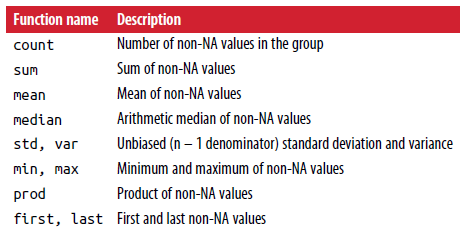

In [3]:
df

,key1,key2,data1,data2
0,a,one,0,5
1,a,two,1,6
2,b,one,2,7
3,b,two,3,8
4,a,one,4,9


In [4]:
grouped = df.groupby('key1')
grouped['data1'].median()##

key1
a    1.0
b    2.5
Name: data1, dtype: float64

#### To use your own aggregation functions, pass any function that aggregates an array to the aggregate or agg method:

In [5]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,4,4
b,1,1


##### OR,  using lambda functions as given below :> 

In [6]:
f=lambda x:x.max()-x.min()
grouped.agg(f)

,data1,data2
key1,,
a,4,4
b,1,1


In [7]:
grouped.describe()

data1                                                data2            \
     count      mean       std  min   25%  50%   75%  max count      mean   
key1                                                                        
a      3.0  1.666667  2.081666  0.0  0.50  1.0  2.50  4.0   3.0  6.666667   
b      2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0   2.0  7.500000   

                                           
           std  min   25%  50%   75%  max  
key1                                       
a     2.081666  5.0  5.50  6.0  7.50  9.0  
b     0.707107  7.0  7.25  7.5  7.75  8.0

### Column-Wise and Multiple Function Application

In [8]:
tips = pd.read_csv('C:/Users/Ramendra/Desktop/Data/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [11]:
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip']*100 / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
5,25.29,4.71,No,Sun,Dinner,4,18.623962


In [12]:
grouped = tips.groupby(['day', 'smoker'])

For descriptive statistics we can pass the name of the function as a string:

In [13]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

In [14]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean        std  peak_to_peak
day  smoker                                    
Fri  No      15.165044   2.812295      6.734944
     Yes     17.478305   5.129267     15.992499
Sat  No      15.804766   3.976730     23.519300
     Yes     14.790607   6.137495     29.009476
Sun  No      16.011294   4.234723     19.322576
     Yes     18.725032  15.413424     64.468495
Thur No      16.029808   3.877420     19.335021
     Yes     16.386327   3.938881     15.124046

You don’t need to accept the names that GroupBy gives to the columns; notably, lambda functions have the name '<lambda>', which makes them hard to identify (you can see for yourself by looking at a function’s __name__ attribute). Thus, if you pass a list of (name, function) tuples, the first element of each tuple will be used as the DataFrame column names (you can think of a list of 2-tuples as an ordered mapping):

In [17]:
grouped_pct.agg([('Average', 'mean'), ('standard dev', np.std),('max-min',f)])

Average  standard dev    max-min
day  smoker                                    
Fri  No      15.165044      2.812295   6.734944
     Yes     17.478305      5.129267  15.992499
Sat  No      15.804766      3.976730  23.519300
     Yes     14.790607      6.137495  29.009476
Sun  No      16.011294      4.234723  19.322576
     Yes     18.725032     15.413424  64.468495
Thur No      16.029808      3.877420  19.335021
     Yes     16.386327      3.938881  15.124046

In [143]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                       total_bill                  
              count       mean        max      count       mean    max
day  smoker                                                           
Fri  No           4  15.165044  18.773467          4  18.420000  22.75
     Yes         15  17.478305  26.348039         15  16.813333  40.17
Sat  No          45  15.804766  29.198966         45  19.661778  48.33
     Yes         42  14.790607  32.573290         42  21.276667  50.81
Sun  No          57  16.011294  25.267250         57  20.506667  48.17
     Yes         19  18.725032  71.034483         19  24.120000  45.35
Thur No          45  16.029808  26.631158         45  17.113111  41.19
     Yes         17  16.386327  24.125452         17  19.190588  43.11

In [144]:
result['tip_pct']

count       mean        max
day  smoker                             
Fri  No          4  15.165044  18.773467
     Yes        15  17.478305  26.348039
Sat  No         45  15.804766  29.198966
     Yes        42  14.790607  32.573290
Sun  No         57  16.011294  25.267250
     Yes        19  18.725032  71.034483
Thur No         45  16.029808  26.631158
     Yes        17  16.386327  24.125452

In [146]:
ftuples = [('Average', 'mean'), ('Variance', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct             total_bill            
               Average    Variance    Average    Variance
day  smoker                                              
Fri  No      15.165044    7.909006  18.420000   25.596333
     Yes     17.478305   26.309378  16.813333   82.562438
Sat  No      15.804766   15.814380  19.661778   79.908965
     Yes     14.790607   37.668849  21.276667  101.387535
Sun  No      16.011294   17.932881  20.506667   66.099980
     Yes     18.725032  237.573646  24.120000  109.046044
Thur No      16.029808   15.034384  17.113111   59.625081
     Yes     16.386327   15.514782  19.190588   69.808518

In [147]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                                  size
                   min        max       mean        std  sum
day  smoker                                                 
Fri  No      12.038523  18.773467  15.165044   2.812295    9
     Yes     10.355540  26.348039  17.478305   5.129267   31
Sat  No       5.679667  29.198966  15.804766   3.976730  115
     Yes      3.563814  32.573290  14.790607   6.137495  104
Sun  No       5.944673  25.267250  16.011294   4.234723  167
     Yes      6.565988  71.034483  18.725032  15.413424   49
Thur No       7.296137  26.631158  16.029808   3.877420  112
     Yes      9.001406  24.125452  16.386327   3.938881   40

### Returning Aggregated Data Without Row Indexes

In [131]:
tips.groupby(['day', 'smoker']).mean()

total_bill       tip      size    tip_pct
day  smoker                                           
Fri  No       18.420000  2.812500  2.250000  15.165044
     Yes      16.813333  2.714000  2.066667  17.478305
Sat  No       19.661778  3.102889  2.555556  15.804766
     Yes      21.276667  2.875476  2.476190  14.790607
Sun  No       20.506667  3.167895  2.929825  16.011294
     Yes      24.120000  3.516842  2.578947  18.725032
Thur No       17.113111  2.673778  2.488889  16.029808
     Yes      19.190588  3.030000  2.352941  16.386327

In [132]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,15.165044
1,Fri,Yes,16.813333,2.714000,2.066667,17.478305
2,Sat,No,19.661778,3.102889,2.555556,15.804766
3,Sat,Yes,21.276667,2.875476,2.476190,14.790607
4,Sun,No,20.506667,3.167895,2.929825,16.011294
5,Sun,Yes,24.120000,3.516842,2.578947,18.725032
6,Thur,No,17.113111,2.673778,2.488889,16.029808
7,Thur,Yes,19.190588,3.030000,2.352941,16.386327


## 3. Apply: General split-apply-combine

In [18]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,27.952481
183,23.17,6.50,Yes,Sun,Dinner,4,28.053517
232,11.61,3.39,No,Sat,Dinner,2,29.198966
67,3.07,1.00,Yes,Sat,Dinner,1,32.573290
178,9.60,4.00,Yes,Sun,Dinner,2,41.666667
172,7.25,5.15,Yes,Sun,Dinner,2,71.034483


In [19]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size    tip_pct
smoker                                                            
No     88        24.71  5.85     No  Thur   Lunch     2  23.674626
       185       20.69  5.00     No   Sun  Dinner     5  24.166264
       51        10.29  2.60     No   Sun  Dinner     2  25.267250
       149        7.51  2.00     No  Thur   Lunch     2  26.631158
       232       11.61  3.39     No   Sat  Dinner     2  29.198966
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  27.952481
       183       23.17  6.50    Yes   Sun  Dinner     4  28.053517
       67         3.07  1.00    Yes   Sat  Dinner     1  32.573290
       178        9.60  4.00    Yes   Sun  Dinner     2  41.666667
       172        7.25  5.15    Yes   Sun  Dinner     2  71.034483

In [20]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size    tip_pct
smoker day                                                              
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  14.285714
       Sat  212       48.33   9.00     No   Sat  Dinner     4  18.621974
       Sun  156       48.17   5.00     No   Sun  Dinner     6  10.379905
       Thur 142       41.19   5.00     No  Thur   Lunch     5  12.138869
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  11.774956
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  19.681165
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3   7.717751
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  11.598237

In [21]:
result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No         15.932846
       Yes        16.319604
std    No          3.990977
       Yes         8.511920
min    No          5.679667
       Yes         3.563814
25%    No         13.690561
       Yes        10.677083
50%    No         15.562472
       Yes        15.384615
75%    No         18.501403
       Yes        19.505852
max    No         29.198966
       Yes        71.034483
dtype: float64

f = lambda x: x.describe()
grouped.apply(f)

### Suppressing the Group Keys

In [22]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,23.674626
185,20.69,5.00,No,Sun,Dinner,5,24.166264
51,10.29,2.60,No,Sun,Dinner,2,25.267250
149,7.51,2.00,No,Thur,Lunch,2,26.631158
232,11.61,3.39,No,Sat,Dinner,2,29.198966
109,14.31,4.00,Yes,Sat,Dinner,2,27.952481
183,23.17,6.50,Yes,Sun,Dinner,4,28.053517
67,3.07,1.00,Yes,Sat,Dinner,1,32.573290
178,9.60,4.00,Yes,Sun,Dinner,2,41.666667
172,7.25,5.15,Yes,Sun,Dinner,2,71.034483


### Quantile and Bucket Analysis

In [23]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0     (-1.188, 0.512]
1     (-1.188, 0.512]
2      (0.512, 2.211]
3     (-1.188, 0.512]
4    (-2.894, -1.188]
5     (-1.188, 0.512]
6    (-2.894, -1.188]
7      (0.512, 2.211]
8       (2.211, 3.91]
9      (0.512, 2.211]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.894, -1.188] < (-1.188, 0.512] < (0.512, 2.211] < (2.211, 3.91]]

In [25]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.894, -1.188]",126.0,2.347144,-0.061856,-2.768696
"(-1.188, 0.512]",533.0,2.868363,0.040303,-2.407097
"(0.512, 2.211]",322.0,2.899836,0.105586,-3.639409
"(2.211, 3.91]",19.0,2.036164,0.139694,-1.243027


In [26]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,1.975021,-0.036611,-2.768696
1,100.0,2.802908,-0.007474,-2.277088
2,100.0,2.158625,0.143720,-2.050228
3,100.0,2.868363,-0.049098,-2.407097
4,100.0,2.657602,0.178114,-1.840651
5,100.0,1.993876,-0.093537,-2.021272
6,100.0,2.214301,0.129557,-2.164189
7,100.0,2.126820,0.105553,-2.199459
8,100.0,2.899836,0.218629,-1.924836


### Example: Filling Missing Values with Group-Specific       Values

In [27]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

0    0.064482
1    0.053137
2    0.064482
3    0.548739
4    0.064482
5   -0.408431
dtype: float64

In [28]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio         -0.182127
New York     -0.586455
Vermont      -1.506003
Florida      -0.477980
Oregon        0.477135
Nevada        1.309566
California    0.797853
Idaho         0.642481
dtype: float64

In [29]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

East   -0.415521
West    0.637494
dtype: float64

In [30]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.182127
New York     -0.586455
Vermont      -0.415521
Florida      -0.477980
Oregon        0.477135
Nevada        0.637494
California    0.797853
Idaho         0.637494
dtype: float64

In [31]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.182127
New York     -0.586455
Vermont       0.500000
Florida      -0.477980
Oregon        0.477135
Nevada       -1.000000
California    0.797853
Idaho        -1.000000
dtype: float64